In [1]:
# python
from tqdm.notebook import tqdm
import sys
import os
import importlib
# columnar analysis
import awkward as ak
import mplhep as hep
import numpy as np
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
def structure(vari, cha1, cha2):
    print("4mu {0} structure: {1}".format(vari, cha1))
    print("2mu2e {0} structure: {1}".format(vari, cha2))
    
    return vari

In [3]:
samples_2mu2e = [
    '2mu2e_500GeV_5GeV_0p08mm',
    '2mu2e_500GeV_5GeV_0p8mm',
    '2mu2e_500GeV_5GeV_8p0mm',
    '2mu2e_500GeV_5GeV_40p0mm',
    '2mu2e_500GeV_5GeV_80p0mm',
]

samples_4mu = [
    '4mu_500GeV_5GeV_0p08mm',
    '4mu_500GeV_5GeV_0p8mm',
    '4mu_500GeV_5GeV_8p0mm',
    '4mu_500GeV_5GeV_40p0mm',
    '4mu_500GeV_5GeV_80p0mm',
]

In [4]:
fileset_4mu = utilities.make_fileset(samples_4mu, "llpNanoAOD_v1")
fileset_2mu2e = utilities.make_fileset(samples_2mu2e, "llpNanoAOD_v1")

events_2mu2e, events_4mu = {}, {}

for i in tqdm(samples_2mu2e):
    fname = fileset_2mu2e[i][0]
    print(fname)
    events_2mu2e[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().Muon
    
for i in tqdm(samples_4mu):
    fname = fileset_4mu[i][0]
    print(fname)
    events_4mu[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().Muon

  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08/LLPnanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08_part-0.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p8/LLPnanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p8_part-0.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-8p0/LLPnanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-8p0_part-0.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-40p0/LLPnanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-40p0_part-0.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-80p0/LLPnanoAOD/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-80p0_part-0.root


  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08/LLPnanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08_part-0.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p8/LLPnanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p8_part-0.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-8p0/LLPnanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-8p0_part-0.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-40p0/LLPnanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-40p0_part-0.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-80p0/LLPnanoAOD/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-80p0_part-0.root


In [5]:
print(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].fields)

['dxy', 'dxyErr', 'dxybs', 'dz', 'dzErr', 'eta', 'ip3d', 'jetPtRelv2', 'jetRelIso', 'mass', 'miniPFRelIso_all', 'miniPFRelIso_chg', 'pfRelIso03_all', 'pfRelIso03_chg', 'pfRelIso04_all', 'phi', 'pt', 'ptErr', 'segmentComp', 'sip3d', 'softMva', 'tkRelIso', 'tunepRelPt', 'mvaLowPt', 'mvaTTH', 'charge', 'jetIdx', 'nStations', 'nTrackerLayers', 'pdgId', 'tightCharge', 'fsrPhotonIdx', 'highPtId', 'highPurity', 'inTimeMuon', 'isGlobal', 'isPFcand', 'isStandalone', 'isTracker', 'jetNDauCharged', 'looseId', 'mediumId', 'mediumPromptId', 'miniIsoId', 'multiIsoId', 'mvaId', 'mvaLowPtId', 'pfIsoId', 'puppiIsoId', 'softId', 'softMvaId', 'tightId', 'tkIsoId', 'triggerIdLoose', 'idx', 'trkPt', 'trkPtErr', 'dzPV', 'dzPVErr', 'dxyPVTraj', 'dxyPVTrajErr', 'dxyPVSigned', 'dxyPVSignedErr', 'ip3DPVSigned', 'ip3DPVSignedErr', 'dxyBS', 'dxyBSErr', 'dzBS', 'dzBSErr', 'dxyBSTraj', 'dxyBSTrajErr', 'dxyBSSigned', 'dxyBSSignedErr', 'ip3DBSSigned', 'ip3DBSSignedErr', 'trkNumPlanes', 'trkNumHits', 'trkNumDTHits', '

# Basic Information
## We want basic 4 vector or related variables

## eta

In [33]:
print(ak.min(ak.flatten(events_4mu[i_4mu].eta)))
print(ak.min(ak.flatten(events_2mu2e[i_2mu].eta)))

-4.526367
-3.5830078


4mu eta structure: [[0.851, 0.624, 0.857, 0.585], [-1.58, ... -2.34], [0.607, 0.104, 0.127, 0.565]]
2mu2e eta structure: [[2.33, 2.35], [-0.658, -0.563], [1.04, ... -1.4], [0.385, 0.337], [1.64, 1.6]]
4mu eta structure: [[-1.24, 0.266, 0.257, -1.27], [-0.511, ... 0.23], [-0.623, -0.622, -0.651, -0.598]]
2mu2e eta structure: [[-0.0941, -0.105], [0.92, 0.902], [0.0773, ... [-0.612, -0.659], [-2.36, -2.33]]
4mu eta structure: [[-1.88, 0.0124, -1.92, 0.302, -1.94], ... [-0.273, -0.936, -0.937, -0.322]]
2mu2e eta structure: [[0.248, 0.219], [0.933, 0.971], [-0.152, ... [0.574, 0.646], [-0.766, -0.596]]
4mu eta structure: [[0.295, 1.76, 0.34, 1.73], [-0.836, 0.389, ... -0.874], [-1.59, 1.83, -1.56, 1.72]]
2mu2e eta structure: [[0.55, 0.577], [-0.0189, 0.037], [1.61], ... [-0.581, -0.641], [-1.27], [0.0856]]
4mu eta structure: [[0.672, 1.08, 1.1], [], [-0.169, ... -0.565], [1.2, -0.224, -0.264, 1.27, -1.78]]
2mu2e eta structure: [[0.967, 1.02, 0.647], [-0.147], [0.151, ... [-1.49, -1.52], [-0

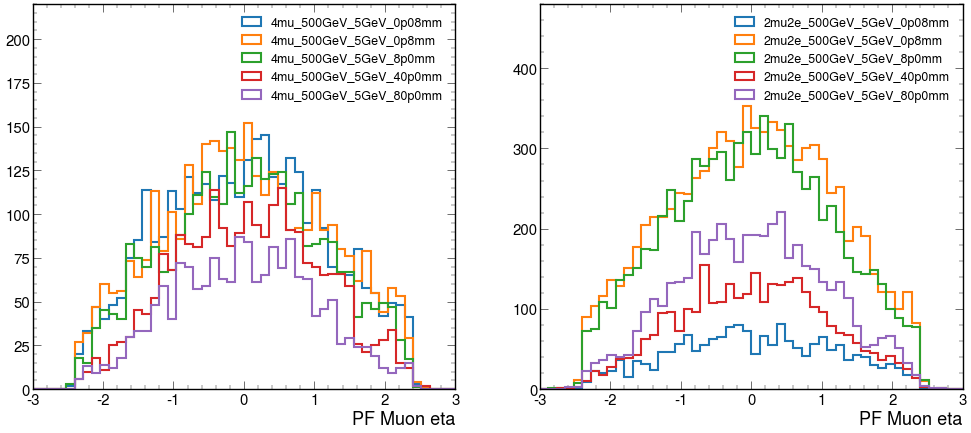

In [35]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("eta", events_4mu[i_4mu].eta, events_2mu2e[i_2mu].eta)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].eta), range=(-3,3), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].eta), range=(-3,3), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-3,3)
ax[1].set_xlim(-3,3)
ax[0].set_ylim(0,220)
ax[1].set_ylim(0,480)
ax[0].set_xlabel('PF Muon eta')
ax[1].set_xlabel('PF Muon eta')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
plt.savefig("../Plots/PF_MUON/Basic/eta.png", bbox_inches="tight")

## mass

4mu mass structure: [[0.106, 0.106, 0.106, 0.106], [0.106, ... 0.106], [0.106, 0.106, 0.106, 0.106]]
2mu2e mass structure: [[0.106, 0.106], [0.106, 0.106], [0.106, ... 0.106], [0.106, 0.106], [0.106, 0.106]]
4mu mass structure: [[0.106, 0.106, 0.106, 0.106], [0.106, ... 0.106], [0.106, 0.106, 0.106, 0.106]]
2mu2e mass structure: [[0.106, 0.106], [0.106, 0.106], [0.106, ... 0.106], [0.106, 0.106], [0.106, 0.106]]
4mu mass structure: [[0.106, 0.106, 0.106, 0.106, 0.106], ... 0.106], [0.106, 0.106, 0.106, 0.106]]
2mu2e mass structure: [[0.106, 0.106], [0.106, 0.106], [0.106, ... 0.106], [0.106, 0.106], [0.106, 0.106]]
4mu mass structure: [[0.106, 0.106, 0.106, 0.106], [0.106, ... 0.106], [0.106, 0.106, 0.106, 0.106]]
2mu2e mass structure: [[0.106, 0.106], [0.106, 0.106], [0.106], ... [0.106, 0.106], [0.106], [0.106]]
4mu mass structure: [[0.106, 0.106, 0.106], [], [0.106, ... 0.106], [0.106, 0.106, 0.106, 0.106, 0.106]]
2mu2e mass structure: [[0.106, 0.106, 0.106], [0.106], [0.106], ... 0

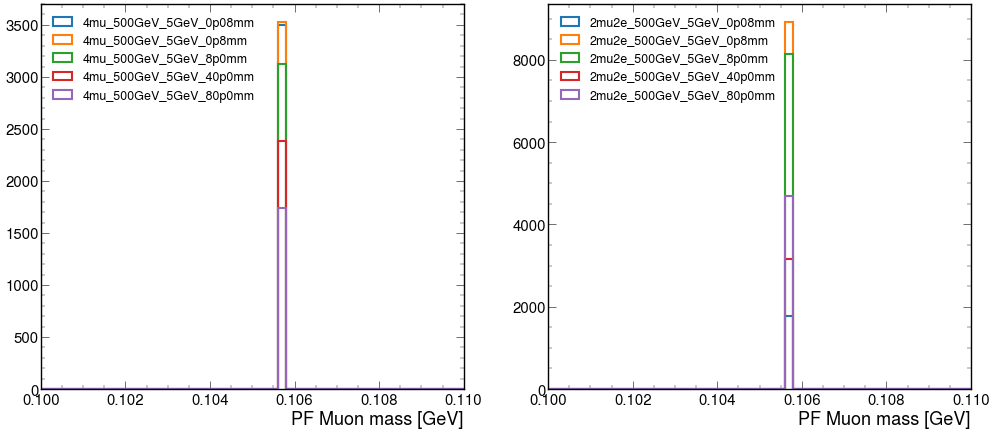

In [7]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("mass", events_4mu[i_4mu].mass, events_2mu2e[i_2mu].mass)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].mass), range=(0.1,0.110), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].mass), range=(0.1,0.110), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(0.1,0.110)
ax[1].set_xlim(0.1,0.110)
ax[0].set_xlabel('PF Muon mass [GeV]')
ax[1].set_xlabel('PF Muon mass [GeV]')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
plt.savefig("../Plots/PF_MUON/Basic/mass.png", bbox_inches="tight")

## phi

4mu phi structure: [[0.199, -2.96, 0.156, -2.99], [1.31, -1.83, ... 2.74], [2.61, -0.468, -0.431, 2.62]]
2mu2e phi structure: [[2.13, 2.23], [3.1, 3.01], [0.4, 1.4, ... -2.18, -0.418], [1.32, 1.24], [-2.99, -3]]
4mu phi structure: [[-2.67, 0.482, 0.477, -2.71], [-2.01, 1.05, ... 1.7], [0.722, -2.41, -2.38, 0.757]]
2mu2e phi structure: [[1.27, 1.32], [0.184, 0.329], [-1.58, ... 0.989], [2.37, 2.35], [0.586, 0.714]]
4mu phi structure: [[-0.724, 2.45, -0.776, 2.73, 1.58], [0.144, ... 2.63], [-0.235, 2.73, 2.77, -0.17]]
2mu2e phi structure: [[-1.63, -1.66], [1.6, 1.61], [2.36, 2.42, ... 0.141], [0.78, 0.841], [-1.02, -1.04]]
4mu phi structure: [[-0.487, 2.43, -0.505, 2.51], [-1.96, 1.17, ... 0.843], [-0.703, 2.44, -0.715, 2.6]]
2mu2e phi structure: [[0.703, 0.671], [-1.56, -1.43], [3.04], ... [-0.848, -0.777], [2.97], [1.62]]
4mu phi structure: [[-0.88, 2.31, 1.92], [], [-2.83, ... -1.89], [-2.69, 0.602, 0.577, -2.67, 2.21]]
2mu2e phi structure: [[-2.12, -2.16, 0.884], [-2.36], [-0.329, ..

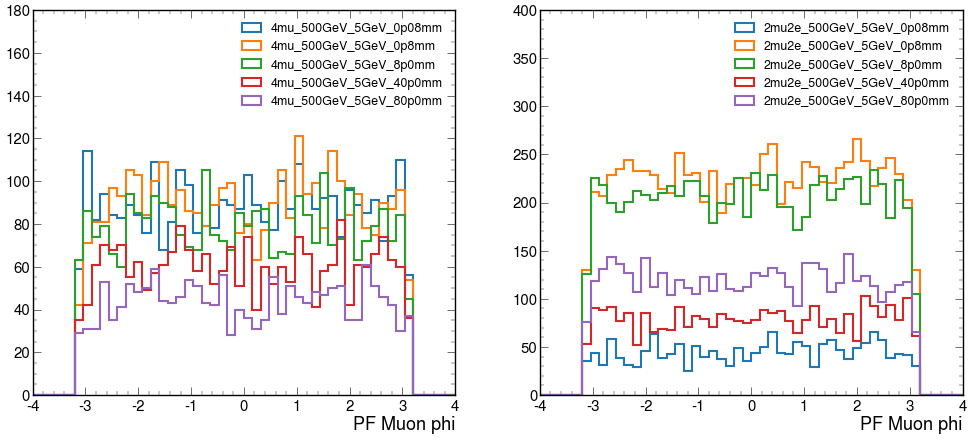

In [8]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("phi", events_4mu[i_4mu].phi, events_2mu2e[i_2mu].phi)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].phi), range=(-4,4), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].phi), range=(-4,4), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(-4,4)
ax[1].set_xlim(-4,4)
ax[0].set_ylim(0,180)
ax[1].set_ylim(0,400)
ax[0].set_xlabel('PF Muon phi')
ax[1].set_xlabel('PF Muon phi')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
plt.savefig("../Plots/PF_MUON/Basic/phi.png", bbox_inches="tight")

## pt

4mu pt structure: [[187, 178, 73.8, 65.7], [232, 182, 63.8, ... 8.82, 3.11], [166, 125, 111, 84.5]]
2mu2e pt structure: [[85.5, 25.5], [239, 6.4], [196, 17.8, ... 5.86, 3.42], [110, 23.4], [104, 101]]
4mu pt structure: [[131, 99.6, 86.5, 59], [206, 184, 63.2, ... 130, 106, 27.5], [176, 126, 120, 74.4]]
2mu2e pt structure: [[110, 82.1], [246, 6.21], [211, 41.3], ... [198, 51], [121, 85.1], [38.9, 28.1]]
4mu pt structure: [[120, 98.7, 50.8, 23.1, 3.56], [404, 215, ... 68.7, 7.72], [219, 190, 74.6, 16]]
2mu2e pt structure: [[120, 98.3], [139, 109], [177, 17.6], ... [42.2, 33], [148, 13.6], [165, 9]]
4mu pt structure: [[258, 186, 82.5, 25.4], [544, 194, 127, ... 48.3, 18.7], [126, 65.5, 31.8, 11.6]]
2mu2e pt structure: [[162, 73.5], [167, 7.38], [119], [279], ... [133, 8.61], [84.2, 33.7], [308], [205]]
4mu pt structure: [[85.5, 16.5, 4.3], [], [598, 197, 92.8], ... [992], [168, 138, 41.4, 26.4, 3.68]]
2mu2e pt structure: [[222, 29, 21.7], [234], [223], ... 38.1, 30.6, 3.99], [207, 36.6], 

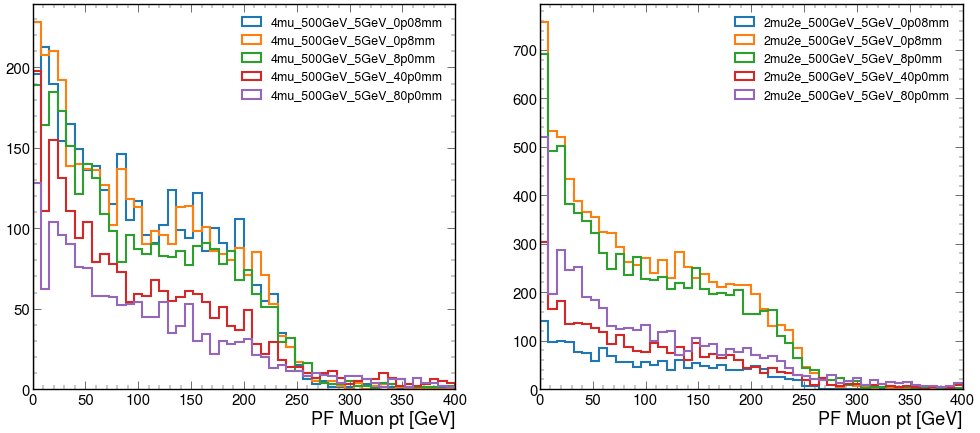

In [9]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("pt", events_4mu[i_4mu].pt, events_2mu2e[i_2mu].pt)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].pt), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].pt), range=(0,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(0,400)
ax[1].set_xlim(0,400)
ax[0].set_xlabel('PF Muon pt [GeV]')
ax[1].set_xlabel('PF Muon pt [GeV]')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
plt.savefig("../Plots/PF_MUON/Basic/pt.png", bbox_inches="tight")

## outerEta

4mu outerEta structure: [[0.849, 0.624, 0.857, 0.585], [-1.58, ... -2.34], [0.608, 0.104, 0.128, 0.566]]
2mu2e outerEta structure: [[2.33, 2.35], [-0.658, -0.556], [1.04, ... -1.71], [0.387, 0.34], [1.64, 1.6]]
4mu outerEta structure: [[-1.25, 0.267, 0.318, -1.27], [-0.509, ... 0.23], [-0.625, -0.621, -0.653, -0.604]]
2mu2e outerEta structure: [[-0.0941, -0.103], [0.868, 0.829], [0.0777, ... [-0.616, -0.658], [-2.36, -2.33]]
4mu outerEta structure: [[-1.88, 0.153, -1.92, 0.297, -1.95], ... [-0.341, -0.936, -0.935, -0.341]]
2mu2e outerEta structure: [[0.249, 0.219], [0.933, 0.973], [-0.15, ... [0.575, 0.656], [-0.766, -0.616]]
4mu outerEta structure: [[0.294, 1.76, 0.34, 1.71], [-0.832, 0.389, ... -0.879], [-1.6, 1.83, -1.69, 1.7]]
2mu2e outerEta structure: [[0.552, 0.582], [-0.0182, 0.0311], [1.62], ... [-0.579, -0.645], [-1.27], [0.0859]]
4mu outerEta structure: [[0.674, 1.08, 1.12], [], [-0.169, ... -0.566], [1.2, -0.224, -0.264, 1.27, -1.78]]
2mu2e outerEta structure: [[0.967, 1.02,

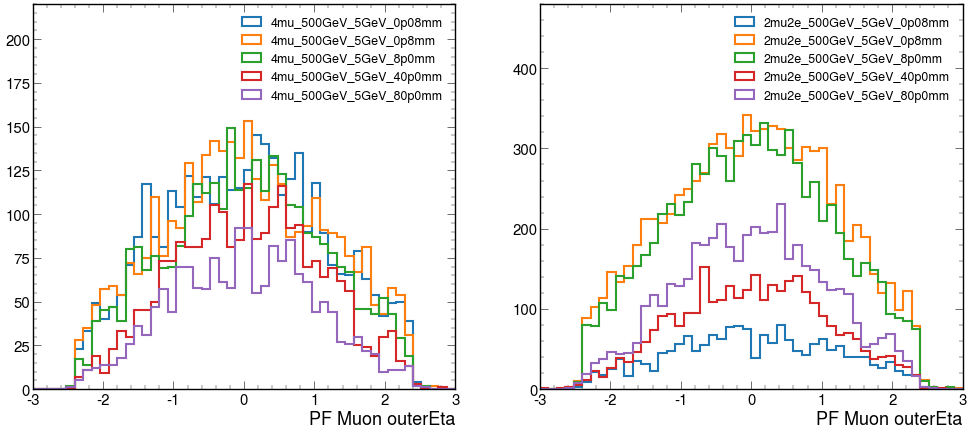

In [40]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("outerEta", events_4mu[i_4mu].outerEta, events_2mu2e[i_2mu].outerEta)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].outerEta), range=(-3,3), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].outerEta), range=(-3,3), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(-3,3)
ax[1].set_xlim(-3,3)
ax[0].set_ylim(0,220)
ax[1].set_ylim(0,480)
ax[0].set_xlabel('PF Muon outerEta')
ax[1].set_xlabel('PF Muon outerEta')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
plt.savefig("../Plots/PF_MUON/Basic/outerEta.png", bbox_inches="tight")

## eta - outerEta

4mu eta - outerEta structure: [[0.00246, -0.00037, -8.58e-06, 4.02e-05, ... -4.9e-06, -0.000859, -0.000971]]
2mu2e eta - outerEta structure: [[4.34e-05, 0.00147], [-0.000499, -0.00736, ... -0.00332], [-0.000395, 0.00109]]
4mu eta - outerEta structure: [[0.00195, -0.000974, -0.0606, 1.65e-05], ... [0.00153, -0.00114, 0.00161, 0.00579]]
2mu2e eta - outerEta structure: [[-1.8e-05, -0.00223], [0.0525, 0.0731, ... -0.000333], [0.00448, -0.000122]]
4mu eta - outerEta structure: [[-0.000587, -0.14, -0.000135, 0.00454, ... 0.0681, 0.000584, -0.0021, 0.0191]]
2mu2e eta - outerEta structure: [[-0.000865, -5.5e-06], [7.17e-05, -0.00181, ... -0.00905], [6.54e-05, 0.0201]]
4mu eta - outerEta structure: [[0.000215, -6.97e-05, -0.000278, 0.0192], ... [0.00851, -0.00163, 0.13, 0.0236]]
2mu2e eta - outerEta structure: [[-0.00229, -0.00538], [-0.000735, 0.00588], ... 0.00427], [-0.000373], [-0.000209]]
4mu eta - outerEta structure: [[-0.00221, 0.00893, -0.0146], ... -7.48e-06, -0.000113, -0.00175, 0.002

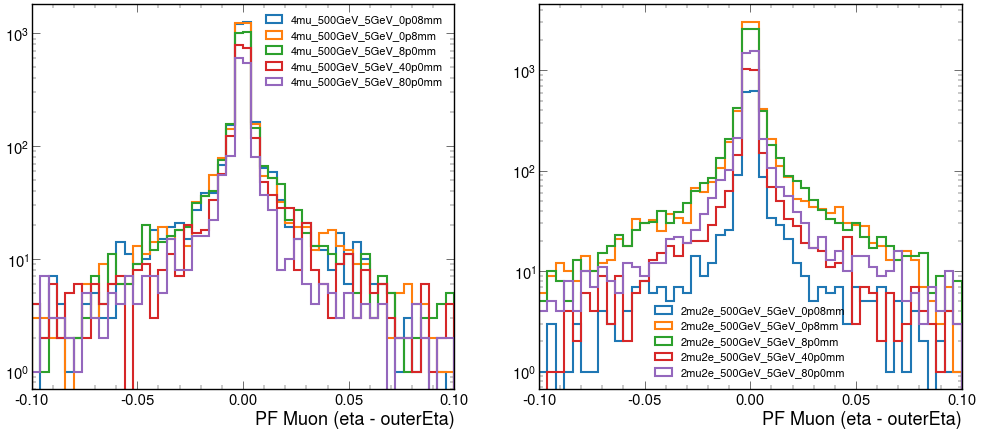

In [11]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("eta - outerEta", events_4mu[i_4mu].eta - events_4mu[i_4mu].outerEta, events_2mu2e[i_2mu].eta - events_2mu2e[i_2mu].outerEta)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].eta - events_4mu[i_4mu].outerEta), range=(-0.1,0.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].eta - events_2mu2e[i_2mu].outerEta), range=(-0.1,0.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(-0.1,0.1)
ax[1].set_xlim(-0.1,0.1)
ax[0].set_xlabel('PF Muon (eta - outerEta)')
ax[1].set_xlabel('PF Muon (eta - outerEta)')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[0].set_xticks([-0.1,-0.05,0,0.05,0.1])
ax[1].set_xticks([-0.1,-0.05,0,0.05,0.1])
plt.savefig("../Plots/PF_MUON/Basic/eta-outerEta.png", bbox_inches="tight")

## outerPhi

4mu outerPhi structure: [[0.181, -2.98, 0.172, -2.97], [1.3, -1.83, ... 2.55], [2.59, -0.458, -0.462, 2.65]]
2mu2e outerPhi structure: [[2.14, 2.19], [3.09, -2.73], [0.385, 1.23, ... -0.102], [1.3, 1.36], [-3.01, -2.98]]
4mu outerPhi structure: [[-2.65, 0.515, 0.446, -2.74], [-1.99, 1.06, ... 1.74], [0.705, -2.44, -2.36, 0.797]]
2mu2e outerPhi structure: [[1.28, 1.3], [0.195, -0.185], [-1.59, ... 0.964], [2.39, 2.32], [0.569, 0.735]]
4mu outerPhi structure: [[-0.737, 2.43, -0.758, 2.93, 1.38], [0.148, ... 2.49], [-0.248, 2.71, 2.81, 0.0415]]
2mu2e outerPhi structure: [[-1.66, -1.65], [1.62, 1.59], [2.34, ... 0.0845], [0.763, 1.06], [-1.04, -0.686]]
4mu outerPhi structure: [[-0.498, 2.44, -0.472, 2.49], [-1.96, ... 0.654], [-0.694, 2.45, -0.618, 2.43]]
2mu2e outerPhi structure: [[0.723, 0.627], [-1.55, -1.87], [3.02], ... [-0.886, -0.701], [2.97], [1.6]]
4mu outerPhi structure: [[-0.814, 2.48, 2.34], [], [-2.82, ... -1.92], [-2.7, 0.578, 0.673, -2.55, 1.93]]
2mu2e outerPhi structure: [[

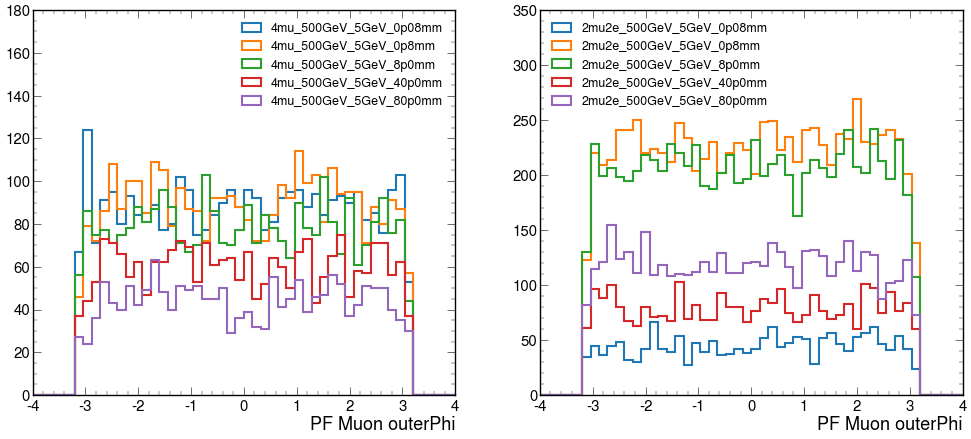

In [12]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("outerPhi", events_4mu[i_4mu].outerPhi, events_2mu2e[i_2mu].outerPhi)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].outerPhi), range=(-4,4), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].outerPhi), range=(-4,4), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(-4,4)
ax[1].set_xlim(-4,4)
ax[0].set_ylim(0,180)
ax[1].set_ylim(0,350)
ax[0].set_xlabel('PF Muon outerPhi')
ax[1].set_xlabel('PF Muon outerPhi')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
plt.savefig("../Plots/PF_MUON/Basic/outerPhi.png", bbox_inches="tight")

## phi - outerPhi

4mu phi - outerPhi structure: [[0.0177, 0.0182, -0.0165, -0.0191], ... [0.0172, -0.00978, 0.0307, -0.0361]]
2mu2e phi - outerPhi structure: [[-0.0103, 0.0418], [0.013, 5.74], ... [0.0275, -0.123], [0.022, -0.0153]]
4mu phi - outerPhi structure: [[-0.0195, -0.0323, 0.0308, 0.0211], ... [0.0174, 0.0236, -0.0278, -0.0398]]
2mu2e phi - outerPhi structure: [[-0.0115, 0.0221], [-0.011, 0.514], ... [-0.0196, 0.033], [0.0167, -0.0208]]
4mu phi - outerPhi structure: [[0.0136, 0.0224, -0.0176, -0.197, 0.201], ... [0.0134, 0.0172, -0.0418, -0.211]]
2mu2e phi - outerPhi structure: [[0.0279, -0.0124], [-0.019, 0.0253], ... [0.0168, -0.222], [0.0192, -0.351]]
4mu phi - outerPhi structure: [[0.0107, -0.00549, -0.0334, 0.0237], ... [-0.0088, -0.00899, -0.0972, 0.165]]
2mu2e phi - outerPhi structure: [[-0.0207, 0.0439], [-0.0167, 0.446], ... 0.0384, -0.0766], [-0.00787], [0.0159]]
4mu phi - outerPhi structure: [[-0.0666, -0.175, -0.418], [], ... [0.0175, 0.0239, -0.0962, -0.115, 0.283]]
2mu2e phi - out

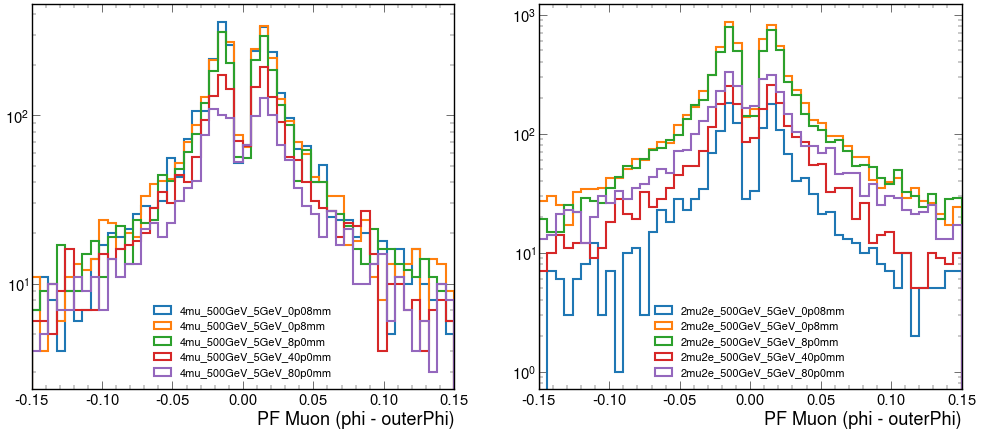

In [13]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("phi - outerPhi", events_4mu[i_4mu].phi - events_4mu[i_4mu].outerPhi, events_2mu2e[i_2mu].phi - events_2mu2e[i_2mu].outerPhi)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].phi - events_4mu[i_4mu].outerPhi), range=(-0.15,0.15), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].phi - events_2mu2e[i_2mu].outerPhi), range=(-0.15,0.15), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(-0.15,0.15)
ax[1].set_xlim(-0.15,0.15)
ax[0].set_xlabel('PF Muon (phi - outerPhi)')
ax[1].set_xlabel('PF Muon (phi - outerPhi)')
ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
plt.savefig("../Plots/PF_MUON/Basic/phi-outerPhi.png", bbox_inches="tight")

## innerPt

In [14]:
import awkward as ak

In [15]:
print(min(ak.flatten(events_4mu[i_4mu].innerPt)))

-1.0


4mu innerPt structure: [[187, 178, 73.8, 65.7], [236, 182, 63.8, ... 8.82, 3.11], [166, 125, 111, 84.5]]
2mu2e innerPt structure: [[85.5, 25.5], [241, 6.4], [196, 17.8, ... 5.86, 3.42], [110, 23.4], [104, 101]]
4mu innerPt structure: [[131, 99.6, 86.5, 59], [207, 184, 63.2, ... 130, 106, 27.5], [176, 126, 120, 74.4]]
2mu2e innerPt structure: [[110, 82.1], [240, 6.21], [214, 41.3], ... [198, 51], [121, 85.1], [38.9, 28.1]]
4mu innerPt structure: [[120, 182, 50.8, -1, 3.56], [-1, 226, ... 92.8, 68.7, 7.72], [219, 190, 74.6, 16]]
2mu2e innerPt structure: [[120, 98.3], [139, 109], [177, 17.6], [199, ... [-1, 33], [148, 13.6], [-1, 9]]
4mu innerPt structure: [[-1, 186, -1, 25.4], [-1, -1, -1, 3.86, ... 130, 48.3, 18.7], [-1, 65.5, -1, 11.6]]
2mu2e innerPt structure: [[162, 73.5], [167, 7.38], [119], [-1], ... [-1, 8.61], [84.2, 33.7], [314], [-1]]
4mu innerPt structure: [[-1, -1, 9.73], [], [-1, -1, 92.8], ... 3.53], [-1], [205, -1, -1, -1, 3.68]]
2mu2e innerPt structure: [[-1, 117, -1], [-

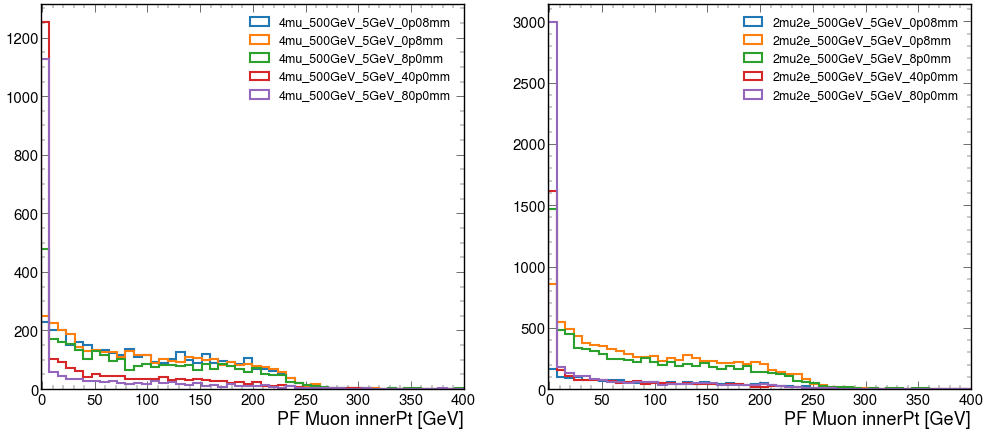

In [27]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("innerPt", events_4mu[i_4mu].innerPt, events_2mu2e[i_2mu].innerPt)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].innerPt), range=(-1,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].innerPt), range=(-1,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(-1,400)
ax[1].set_xlim(-1,400)
ax[0].set_xlabel('PF Muon innerPt [GeV]')
ax[1].set_xlabel('PF Muon innerPt [GeV]')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
plt.savefig("../Plots/PF_MUON/Basic/innerPt.png", bbox_inches="tight")

## pt - innerPt

4mu pt - innerPt structure: [[0, 0, 0, 0], [-3.93, 0, 0, 17.6, 0], ... [0.308, 0, 0, 0, 0], [0, 0, 0, 0]]
2mu2e pt - innerPt structure: [[0, 0], [-1.41, 0], [0, 0, 0], [0, 0], ... 0], [0, 0, 0, 0], [0, 0], [0, 0]]
4mu pt - innerPt structure: [[0, 0, 0, 0], [-0.687, 0, 0, 0], [0, 0, 0, ... 0, 0], [2.01, 0, 0, 0], [0, 0, 0, 0]]
2mu2e pt - innerPt structure: [[0, 0], [5.45, 0], [-2.25, 0], [0, 0], ... [-2.9, 0], [0, 0], [0, 0], [0, 0]]
4mu pt - innerPt structure: [[0, -83, 0, 24.1, 0], [405, -11.1, 0], [0, ... 0], [0, 0, 0, 0], [-0.058, 0, 0, 0]]
2mu2e pt - innerPt structure: [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0, ... 0], [0, 0], [43.2, 0], [0, 0], [166, 0]]
4mu pt - innerPt structure: [[259, 0, 83.5, 0], [545, 195, 128, 0], [0, ... 0], [0, 0, 0, 0], [127, 0, 32.8, 0]]
2mu2e pt - innerPt structure: [[0, 0], [0, 0], [0], [280], [0, 75.4, ... 29.7], [134, 0], [0, 0], [-5.92], [206]]
4mu pt - innerPt structure: [[86.5, 17.5, -5.44], [], [599, 198, 0], ... 0], [993], [-37.5, 139, 42.4, 27.4,

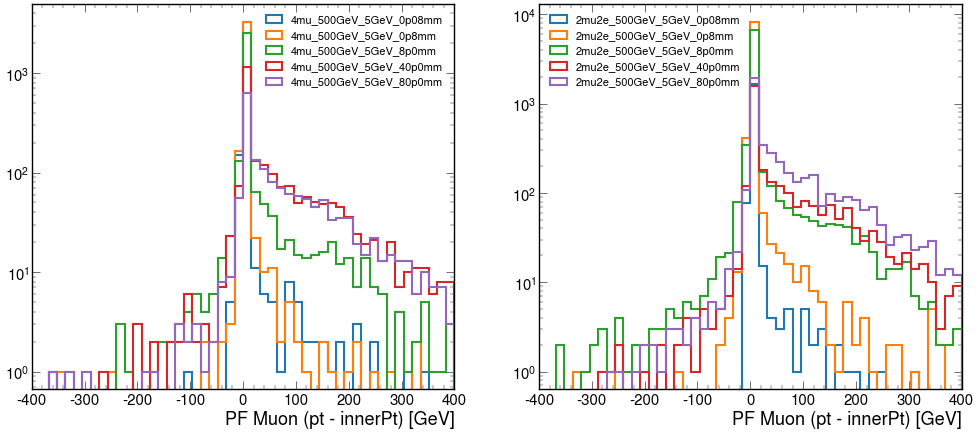

In [17]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("pt - innerPt", events_4mu[i_4mu].pt - events_4mu[i_4mu].innerPt, events_2mu2e[i_2mu].pt - events_2mu2e[i_2mu].innerPt)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].pt - events_4mu[i_4mu].innerPt), range=(-400,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].pt - events_2mu2e[i_2mu].innerPt), range=(-400,400), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(-400,400)
ax[1].set_xlim(-400,400)
ax[0].set_xlabel('PF Muon (pt - innerPt) [GeV]')
ax[1].set_xlabel('PF Muon (pt - innerPt) [GeV]')
ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16, loc='upper left')
plt.savefig("../Plots/PF_MUON/Basic/pt-innerPt.png", bbox_inches="tight")

## innerEta

4mu innerEta structure: [[0.851, 0.624, 0.857, 0.585], [-1.58, ... -2.34], [0.607, 0.104, 0.127, 0.565]]
2mu2e innerEta structure: [[2.33, 2.35], [-0.658, -0.564], [1.04, ... -1.4], [0.385, 0.337], [1.64, 1.6]]
4mu innerEta structure: [[-1.24, 0.266, 0.257, -1.27], [-0.511, ... 0.23], [-0.623, -0.622, -0.651, -0.598]]
2mu2e innerEta structure: [[-0.0941, -0.105], [0.92, 0.902], [0.0772, ... [-0.612, -0.659], [-2.36, -2.33]]
4mu innerEta structure: [[-1.88, -0.0514, -1.92, -5, -1.94], ... -2.11], [-0.273, -0.936, -0.937, -0.322]]
2mu2e innerEta structure: [[0.248, 0.219], [0.933, 0.971], [-0.152, ... -1.67], [0.574, 0.647], [-5, -0.596]]
4mu innerEta structure: [[-5, 1.76, -5, 1.73], [-5, -5, -5, ... 0.52, 0.526, -0.873], [-5, 1.83, -5, 1.72]]
2mu2e innerEta structure: [[0.55, 0.577], [-0.0189, 0.037], [1.61], ... [-0.581, -0.641], [-1.28], [-5]]
4mu innerEta structure: [[-5, -5, 1.1], [], [-5, -5, -0.134], ... 0.943], [-5], [1.26, -5, -5, -5, -1.78]]
2mu2e innerEta structure: [[-5, 1.7

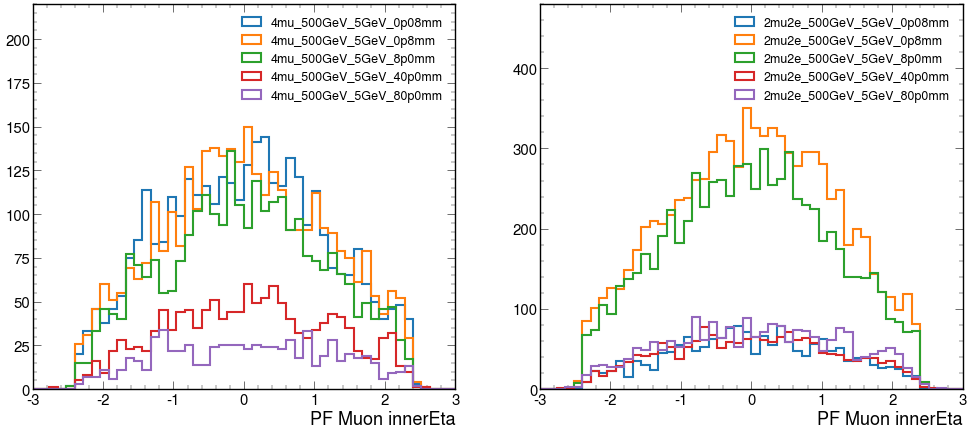

In [18]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("innerEta", events_4mu[i_4mu].innerEta, events_2mu2e[i_2mu].innerEta)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].innerEta), range=(-3,3), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].innerEta), range=(-3,3), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(-3,3)
ax[1].set_xlim(-3,3)
ax[0].set_xlabel('PF Muon innerEta')
ax[1].set_xlabel('PF Muon innerEta')
ax[0].set_ylim(0,220)
ax[1].set_ylim(0,480)
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
plt.savefig("../Plots/PF_MUON/Basic/innerEta.png", bbox_inches="tight")

## eta - innerEta

4mu eta - innerEta structure: [[-4.65e-06, -2.07e-05, -6.97e-06, 5.45e-05, ... -7.57e-06, 1.06e-06, 4.46e-05]]
2mu2e eta - innerEta structure: [[0.000184, -0.000146], [-2.35e-05, 4.29e-05, ... 2.95e-05], [5.59e-05, -7.92e-05]]
4mu eta - innerEta structure: [[-2.53e-05, 8.58e-06, 1.07e-05, 4.16e-05, ... -1.35e-05, 2.44e-05, 5.51e-05]]
2mu2e eta - innerEta structure: [[-1.65e-06, 7.03e-06], [4.43e-05, -3.32e-05, ... 1.96e-05], [0.000227, 0.000186]]
4mu eta - innerEta structure: [[-6.12e-05, 0.0638, -0.000114, 5.3, ... -1.03e-05, -4.51e-05, -5.83e-05, -4.29e-06]]
2mu2e eta - innerEta structure: [[-1.77e-06, 2.12e-06], [-4.43e-05, 2.32e-05, ... -5.32e-05], [4.23, -4.14e-05]]
4mu eta - innerEta structure: [[5.29, -3.71e-05, 5.34, 2.11e-05], [4.16, ... [3.41, 2.54e-05, 3.44, 1.69e-05]]
2mu2e eta - innerEta structure: [[3.3e-05, -3.69e-05], [3.74e-07, -1.91e-06], ... 1.14e-05], [0.00639], [5.09]]
4mu eta - innerEta structure: [[5.67, 6.08, -0.000241], [], [4.83, ... [-0.0565, 4.78, 4.74, 6.27

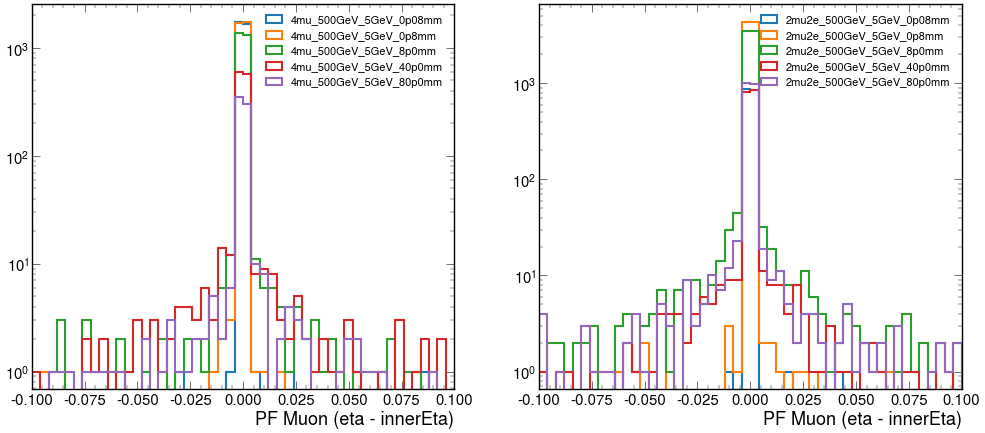

In [19]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("eta - innerEta", events_4mu[i_4mu].eta - events_4mu[i_4mu].innerEta, events_2mu2e[i_2mu].eta - events_2mu2e[i_2mu].innerEta)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].eta - events_4mu[i_4mu].innerEta), range=(-0.1,0.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].eta - events_2mu2e[i_2mu].innerEta), range=(-0.1,0.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(-0.1,0.1)
ax[1].set_xlim(-0.1,0.1)
ax[0].set_xlabel('PF Muon (eta - innerEta)')
ax[1].set_xlabel('PF Muon (eta - innerEta)')
ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16, loc='upper right')
plt.savefig("../Plots/PF_MUON/Basic/eta-innerEta.png", bbox_inches="tight")

## innerEta - outerEta

4mu innerEta - outerEta structure: [[0.00246, -0.000349, -1.61e-06, -1.43e-05, ... 2.67e-06, -0.00086, -0.00102]]
2mu2e innerEta - outerEta structure: [[-0.00014, 0.00162], [-0.000476, -0.0074, ... -0.00335], [-0.000451, 0.00117]]
4mu innerEta - outerEta structure: [[0.00198, -0.000983, -0.0606, -2.52e-05], ... [0.00153, -0.00113, 0.00158, 0.00573]]
2mu2e innerEta - outerEta structure: [[-1.63e-05, -0.00224], [0.0525, 0.0731, ... -0.000352], [0.00425, -0.000308]]
4mu innerEta - outerEta structure: [[-0.000526, -0.204, -2.06e-05, -5.3, ... 0.0681, 0.000629, -0.00205, 0.0191]]
2mu2e innerEta - outerEta structure: [[-0.000863, -7.61e-06], [0.000116, -0.00183, ... -0.00899], [-4.23, 0.0201]]
4mu innerEta - outerEta structure: [[-5.29, -3.27e-05, -5.34, 0.0192], [-4.17, ... [-3.4, -0.00166, -3.31, 0.0236]]
2mu2e innerEta - outerEta structure: [[-0.00233, -0.00534], [-0.000736, 0.00588], ... 0.00426], [-0.00676], [-5.09]]
4mu innerEta - outerEta structure: [[-5.67, -6.08, -0.0144], [], [-4.8

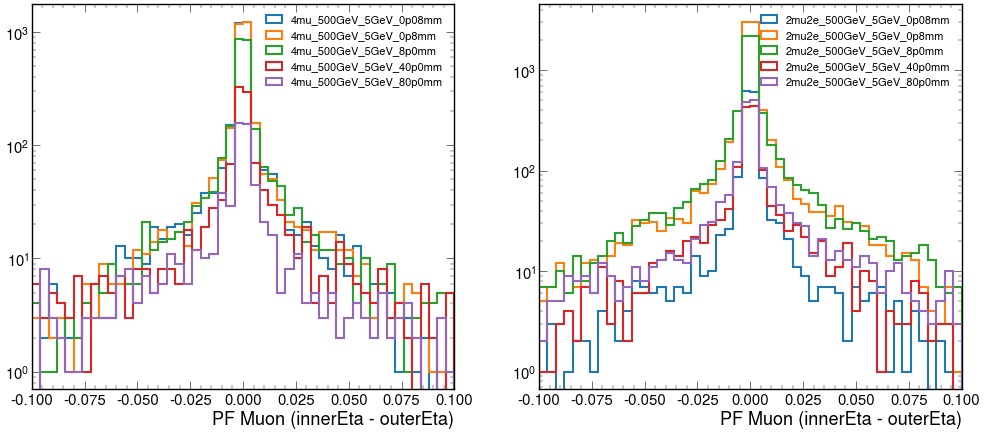

In [20]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("innerEta - outerEta", events_4mu[i_4mu].innerEta - events_4mu[i_4mu].outerEta, events_2mu2e[i_2mu].innerEta - events_2mu2e[i_2mu].outerEta)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].innerEta - events_4mu[i_4mu].outerEta), range=(-0.1,0.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].innerEta - events_2mu2e[i_2mu].outerEta), range=(-0.1,0.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(-0.1,0.1)
ax[1].set_xlim(-0.1,0.1)
ax[0].set_xlabel('PF Muon (innerEta - outerEta)')
ax[1].set_xlabel('PF Muon (innerEta - outerEta)')
ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16, loc='upper right')
plt.savefig("../Plots/PF_MUON/Basic/innerEta-outerEta.png", bbox_inches="tight")

## innerPhi

4mu innerPhi structure: [[0.199, -2.96, 0.156, -2.99], [1.31, -1.83, ... 2.74], [2.61, -0.468, -0.431, 2.62]]
2mu2e innerPhi structure: [[2.13, 2.23], [3.1, 3.01], [0.4, 1.4, ... -2.18, -0.418], [1.32, 1.24], [-2.99, -3]]
4mu innerPhi structure: [[-2.67, 0.482, 0.477, -2.72], [-2.01, 1.05, ... 1.7], [0.722, -2.41, -2.38, 0.757]]
2mu2e innerPhi structure: [[1.27, 1.32], [0.184, 0.329], [-1.58, ... 0.989], [2.37, 2.35], [0.586, 0.714]]
4mu innerPhi structure: [[-0.723, 2.45, -0.776, -5, 1.58], [-5, ... 2.63], [-0.235, 2.73, 2.77, -0.17]]
2mu2e innerPhi structure: [[-1.63, -1.66], [1.6, 1.61], [2.36, 2.42, ... 0.141], [0.78, 0.841], [-5, -1.04]]
4mu innerPhi structure: [[-5, 2.43, -5, 2.51], [-5, -5, -5, ... -2.28, -2.24, 0.843], [-5, 2.44, -5, 2.6]]
2mu2e innerPhi structure: [[0.703, 0.671], [-1.56, -1.43], [3.04], ... [-0.848, -0.777], [2.97], [-5]]
4mu innerPhi structure: [[-5, -5, 1.94], [], [-5, -5, 0.34], ... -3.09], [-5], [-2.69, -5, -5, -5, 2.21]]
2mu2e innerPhi structure: [[-5, -

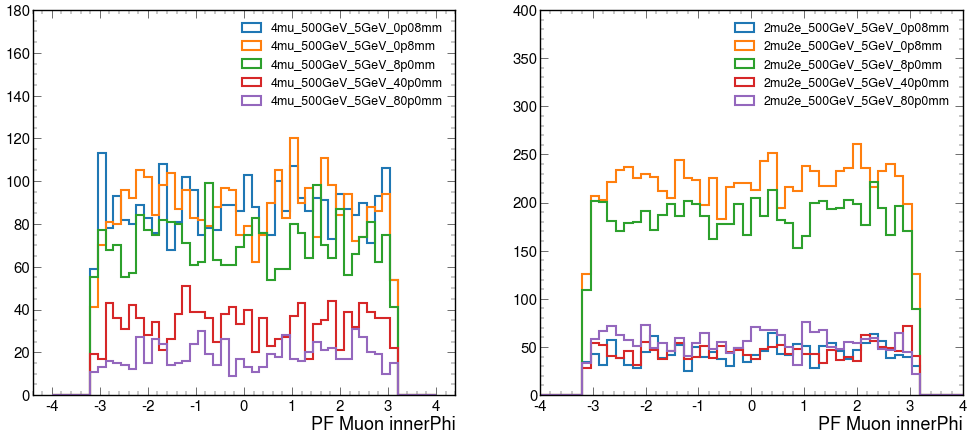

In [21]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("innerPhi", events_4mu[i_4mu].innerPhi, events_2mu2e[i_2mu].innerPhi)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].innerPhi), range=(-4,4), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].innerPhi), range=(-4,4), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(-4.4)
ax[1].set_xlim(-4,4)
ax[0].set_xlabel('PF Muon innerPhi')
ax[1].set_xlabel('PF Muon innerPhi')
ax[0].set_ylim(0,180)
ax[1].set_ylim(0,400)
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
plt.savefig("../Plots/PF_MUON/Basic/innerPhi.png", bbox_inches="tight")

## phi - innerPhi

4mu phi - innerPhi structure: [[-6.87e-06, 7.87e-06, 1.04e-05, 7.63e-06, ... -2.27e-05, 1.98e-05, 0.000161]]
2mu2e phi - innerPhi structure: [[0.000145, 0.000123], [2.1e-05, 9.8e-05, ... 3.27e-05], [3.5e-05, -1.19e-05]]
4mu phi - innerPhi structure: [[-6.72e-05, -4.62e-06, 1.83e-05, 0.000167, ... 5.65e-05, -0.000199, -4.37e-05]]
2mu2e phi - innerPhi structure: [[-6.38e-05, -2.46e-05], [5.68e-05, 2.88e-05, ... -3.41e-05], [1.17e-05, -2.31e-05]]
4mu phi - innerPhi structure: [[-2.88e-05, 0.00306, 5.8e-05, 7.73, ... -1.48e-05, 1.45e-05, 2.55e-05, 1.28e-05]]
2mu2e phi - innerPhi structure: [[9.82e-05, 1.07e-05], [-2.71e-05, 7.26e-05, ... -3.08e-05], [3.98, -7.52e-05]]
4mu phi - innerPhi structure: [[4.51, -1.24e-05, 4.49, -0.000161], [3.04, ... [4.3, -4.12e-05, 4.29, -0.000161]]
2mu2e phi - innerPhi structure: [[-1.76e-05, 2.9e-05], [-9.3e-06, -2.19e-05], ... -3.46e-05], [-0.000294], [6.62]]
4mu phi - innerPhi structure: [[4.12, 7.31, -0.0244], [], [2.17, ... 3.11], [0.00138, 5.6, 5.58, 2.

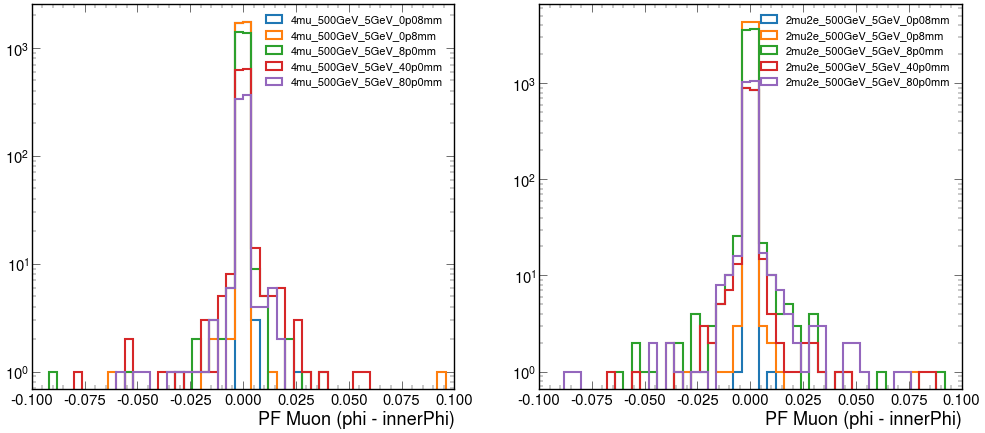

In [22]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("phi - innerPhi", events_4mu[i_4mu].phi - events_4mu[i_4mu].innerPhi, events_2mu2e[i_2mu].phi - events_2mu2e[i_2mu].innerPhi)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].phi - events_4mu[i_4mu].innerPhi), range=(-0.1,0.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].phi - events_2mu2e[i_2mu].innerPhi), range=(-0.1,0.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(-0.1,0.1)
ax[1].set_xlim(-0.1,0.1)
ax[0].set_xlabel('PF Muon (phi - innerPhi)')
ax[1].set_xlabel('PF Muon (phi - innerPhi)')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16,loc="upper right")
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_MUON/Basic/phi-innerPhi.png", bbox_inches="tight")

## innerPhi - outerPhi

4mu innerPhi - outerPhi structure: [[0.0178, 0.0182, -0.0165, -0.0191], ... [0.0173, -0.00976, 0.0307, -0.0362]]
2mu2e innerPhi - outerPhi structure: [[-0.0105, 0.0417], [0.0129, 5.74], ... [0.0274, -0.123], [0.0219, -0.0153]]
4mu innerPhi - outerPhi structure: [[-0.0195, -0.0323, 0.0308, 0.0209], ... [0.0174, 0.0236, -0.0276, -0.0398]]
2mu2e innerPhi - outerPhi structure: [[-0.0114, 0.0222], [-0.0111, 0.514], ... [-0.0195, 0.0331], [0.0167, -0.0208]]
4mu innerPhi - outerPhi structure: [[0.0137, 0.0193, -0.0176, -7.93, 0.201], ... [0.0134, 0.0172, -0.0419, -0.211]]
2mu2e innerPhi - outerPhi structure: [[0.0278, -0.0125], [-0.019, 0.0253], ... [0.0168, -0.222], [-3.96, -0.351]]
4mu innerPhi - outerPhi structure: [[-4.5, -0.00548, -4.53, 0.0238], [-3.04, ... [-4.31, -0.00894, -4.38, 0.165]]
2mu2e innerPhi - outerPhi structure: [[-0.0207, 0.0439], [-0.0167, 0.446], ... 0.0384, -0.0765], [-0.00757], [-6.6]]
4mu innerPhi - outerPhi structure: [[-4.19, -7.48, -0.394], [], [-2.18, ... [0.0161

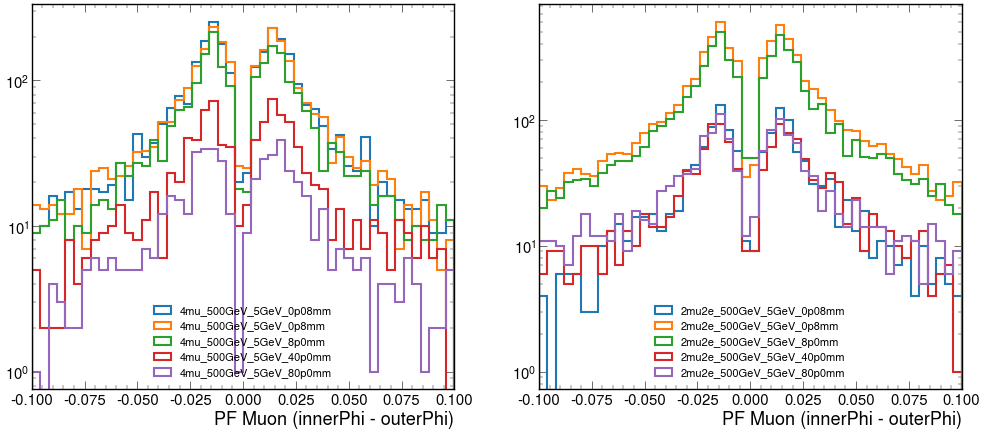

In [41]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("innerPhi - outerPhi", events_4mu[i_4mu].innerPhi - events_4mu[i_4mu].outerPhi, events_2mu2e[i_2mu].innerPhi - events_2mu2e[i_2mu].outerPhi)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].innerPhi - events_4mu[i_4mu].outerPhi), range=(-0.1,0.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].innerPhi - events_2mu2e[i_2mu].outerPhi), range=(-0.1,0.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(-0.1,0.1)
ax[1].set_xlim(-0.1,0.1)
ax[0].set_xlabel('PF Muon (innerPhi - outerPhi)')
ax[1].set_xlabel('PF Muon (innerPhi - outerPhi)')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_MUON/Basic/innerPhi-outerPhi.png", bbox_inches="tight")